# Übung 3 - Merkmalsextraktion 

**Name:** Aykan Berke Sandal 190503012, **Matr.-Nr.:** Deniz Özdemirli 190503029
<br>
**Name:** Mithat Can Turan 190503021, **Matr.-Nr.:** Dilanur Gider 190503060

---

## Bearbeitungszeitraum

**Bearbeitungsbegin:** 02.12.2022
<br>
**Abgabe:** 16.12.2022

---

## Aufgabenbeschreibung

Das Ziel dieser Übung ist es, den prinzipiellen Ablauf einer Bildanalyse (inkl. einzelne Teilschritte) auf ein Bild aunzuwenden und somit auch den Zusammenhang einzelner Operationen besser nachzuvollziehen.

![AblaufBildanalyse](AblaufBildanalyse.png)




### Generelle Hinweise zur Bearbeitung: 

Die Herausforderung hierbei ist, dass mehrere Phasen der Bildverarbeitung aufeinander aufbauend umgesetzt werden müssen. Zudem ist die Planung sowie die Durchführung des Lösungsweges (ohne konkrete Vorgaben) Ihnen überlassen. Jedoch sollten Sie folgende allgemeine und hilfreiche "Werkzeuge" ins Betracht ziehen:

**Phasen der Bildverarbeitung:**
1.	Bild öffnen
2.	Bildvorverarbeitung
3.	Segmentierung
4.	Objekterkennung
5.	Analyse
6.	Visualisierung

**Zur Segmentierung:**
- iterative Berechnung des optimalen Schwellenwertes
- Histogrammanalyse für multimodale Histogramme

**Zur Objekterkennung**
- Algorithmus zur Detektion von Objekten (Kreise, Geraden, etc.)
- Hough-Transformation
- Skelettierung



### Hinweise zur Abgabe und zur Benotung

- Füllen Sie unbedingt die erste Zelle unterhalb der Überschrift mit Name und Matr.-Nr. aus!
- Entfernen Sie vor dem Upload alle Ausgaben aus dem Notebook!
- Die Bilddatei muss nicht abgegeben werden.


### Viel Erfolg!

## Aufgabenbeschreibung

Lesen Sie `roentgen.tif` mit Hilfe der `matplotlib`-Bibliothek ein. Visualisieren Sie das, in der Datei enthaltene Bild (verwenden Sie die Funktionen `imshow` und `show`).

1.	Berechnen Sie die Anzahl der Finger im Bild.
2.	Finden Sie die Knochen und die Hand. Berechnen Sie dazu den Anteil der Knochen an der Gesamtfläche der Hand.
3.	Berechnen Sie die Anzahl gesamten (einzelnen) Knochen.
 
**Bonus:** 
4. Berechnen Sie die zusätzlich zur Anzahl auch die maximale Länge jedes Knochens.

## Quellen


*   Aufgabe 1 : https://github.com/NeilFabiao/Counting-Fingers-DIP
*   Aufgabe 2 : https://stackoverflow.com/questions/67624759/how-to-segment-femur-from-x-ray-in-opencv

*   Aufgabe 3 : https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0
*   Aufgabe 4 : https://docs.opencv.org/3.4/dd/d49/tutorial_py_contour_features.html





###Importe

In [193]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import skimage
from sklearn.metrics import pairwise

### Aufgabe 1
Berechnen Sie die Anzahl der Finger im Bild.

In [ ]:
#Bilder
path = "roentgen.tif"
path2 = "Testbild_Roentgen2.jpg"
path3 = "Testbild3.jpg"

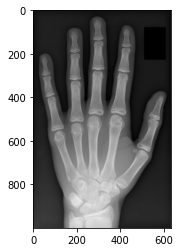

'\nimage = plt.imread(path) # array\nplt.imshow(image)\nplt.show()\n'

In [ ]:
# Bild lesen
image = cv2.imread(path, 1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixels = np.array(image)
plt.imshow(pixels)
plt.show()

"""
image = plt.imread(path) # array
plt.imshow(image)
plt.show()
"""

In [ ]:
def finger_count(path):

    # lesen
    image = plt.imread(path) 
    gray_img = cv2.imread(path,0)

    # resize
    row, col= gray_img.shape
    if row != col:
        resized_gray_img = np.array(Image.fromarray(gray_img).resize((row,row), resample=1))
    
    # threshold
    binr = cv2.threshold(resized_gray_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
    
    # zum Füllen von Zwischenknochenlücken
    kernel = np.ones((9,9),np.uint8)
    closing = cv2.morphologyEx(binr, cv2.MORPH_CLOSE, kernel, iterations = 4)
    
    # so dass nur die Handfläche auf dem Bild bleibt
    erosion = cv2.erode(closing,kernel,iterations = 11)
    
    # so dass die Palme im Originalbild und in der erodierten Version die gleiche Größe hat
    dilate = cv2.dilate(erosion,kernel,iterations = 15)
    
    # so dass nur die Finger im Bild bleiben und unnötige Pixel entfernt werden
    finger_raw = closing-dilate
    finger = cv2.erode(finger_raw,kernel,iterations = 3)
        
    # Wie viele Regionen sind auf dem Bild noch vorhanden?
    output = cv2.connectedComponentsWithStats(finger)
    (numLabels, labels, stats, centroids) = output
    print("Stats: ", stats)
    #print(numLabels)
    area = []
    for i in range(numLabels):
      a = stats[i, cv2.CC_STAT_AREA]
      area.append(a)
    print("Bereiche der Regionen: " ,area)
    
    
    # Damit es Felder unter 150 nicht als Finger zählt
    real_counts = []
    for k in range(len(area)):
      if(area[k] > 150) :
        real_counts.append(stats[k])

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15),
                         sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(binr, cmap=plt.cm.gray)
    ax[0].axis('off')
    ax[0].set_title('Original', fontsize=20)

    ax[1].imshow(erosion, cmap=plt.cm.gray)
    ax[1].axis('off')
    ax[1].set_title('Handfläche', fontsize=20)
    
    ax[2].imshow(dilate, cmap=plt.cm.gray)
    ax[2].axis('off')
    ax[2].set_title('Dilation der Handfläche', fontsize=20)
    
    ax[3].imshow(finger, cmap=plt.cm.gray)
    ax[3].axis('off')
    ax[3].set_title('Nur Fingern', fontsize=20)
    
    return len(real_counts)-1
    

Stats:  [[     0      0   1000   1000 951695]
 [   436     62     64    342  13835]
 [   609    105     85    296  10250]
 [   281    117     55    333  12286]
 [    85    236    104    280   6300]
 [   820    408    108    243   5634]]
Bereiche der Regionen:  [951695, 13835, 10250, 12286, 6300, 5634]
Finger number is:  5


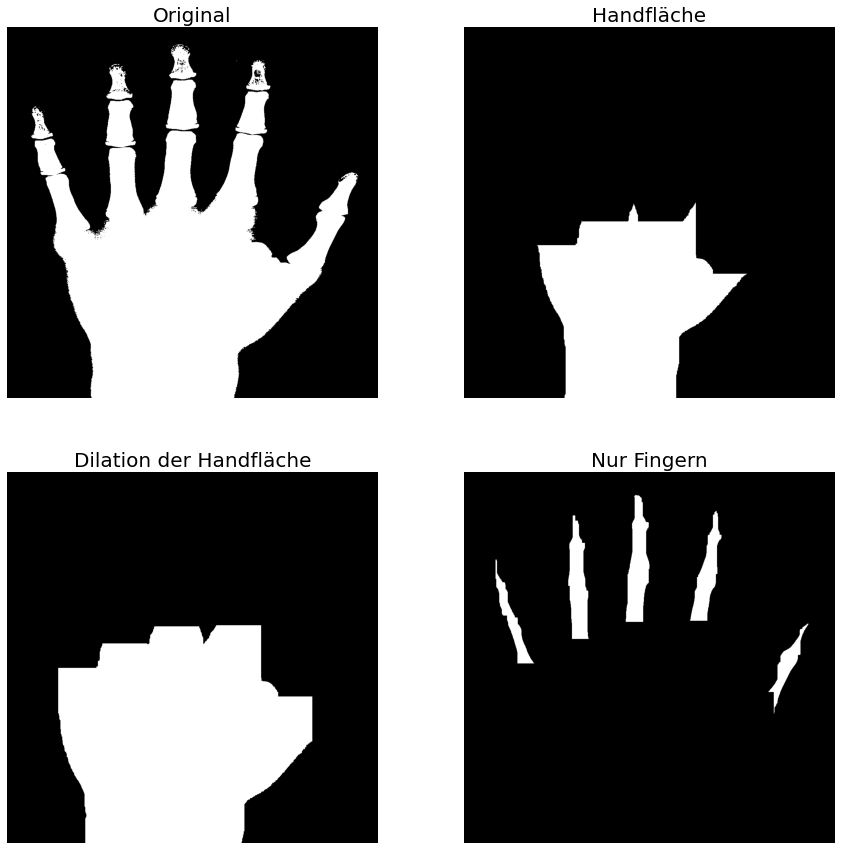

In [ ]:
# Bild 1
number = finger_count(path)
print('Finger number is: ', number)

Stats:  [[      0       0    1103    1103 1199848]
 [    787      97      23     282    3647]
 [    226     126      22     247    2974]
 [    688     157      24     225    2338]
 [    874     156      30     223    2053]
 [    309     174      19     199    2019]
 [    130     192      29     211    2084]
 [     48     331       1       3       3]
 [    972     346      19      56     240]
 [     56     379      16      65     347]
 [    417     448      16      75     545]
 [    568     468      24      63     508]
 [    592     532       1       1       1]
 [    593     535       1       1       1]
 [    595     541       1       1       1]]
Bereiche der Regionen:  [1199848, 3647, 2974, 2338, 2053, 2019, 2084, 3, 240, 347, 545, 508, 1, 1, 1]
Finger number is:  10


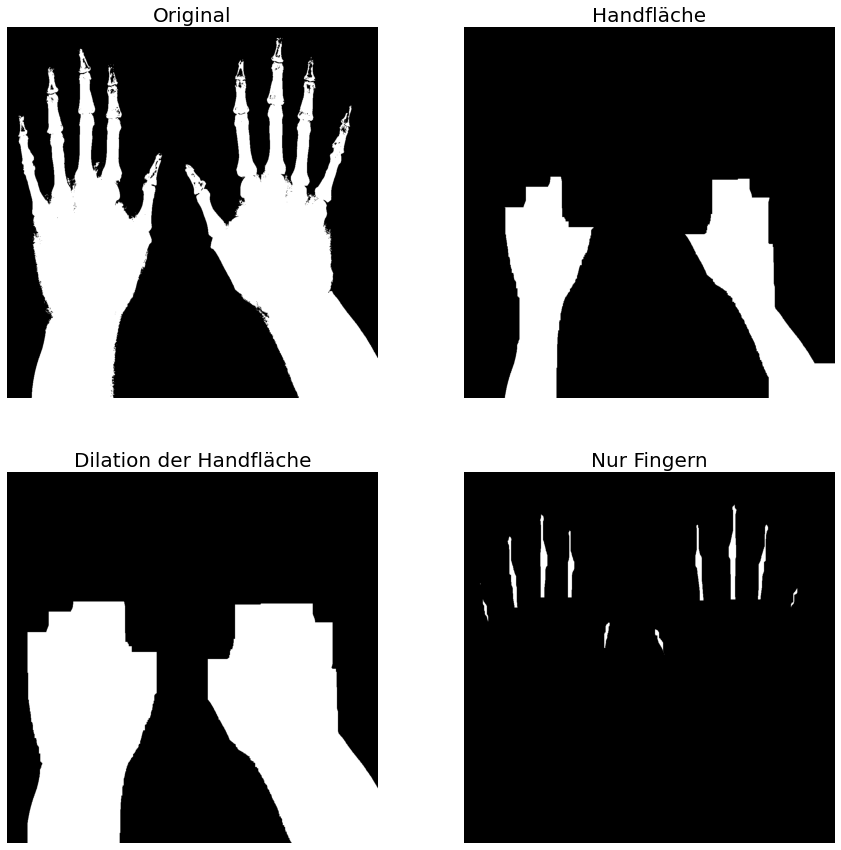

In [ ]:
# Bild 2
number2 = finger_count(path2)
print('Finger number is: ', number2)

Stats:  [[      0       0    1077    1077 1110477]
 [    582      60      55     375   11913]
 [    373      80      78     381   12525]
 [    754     124      62     318   10559]
 [    212     209       2       9      10]
 [    214     219      95     288    6671]
 [    935     381      76     203    6006]
 [     32     492      46      95     735]
 [     78     592      34      31     306]
 [    165     668      16      24     145]
 [      0     950      17     127     582]]
Bereiche der Regionen:  [1110477, 11913, 12525, 10559, 10, 6671, 6006, 735, 306, 145, 582]
Finger number is:  8


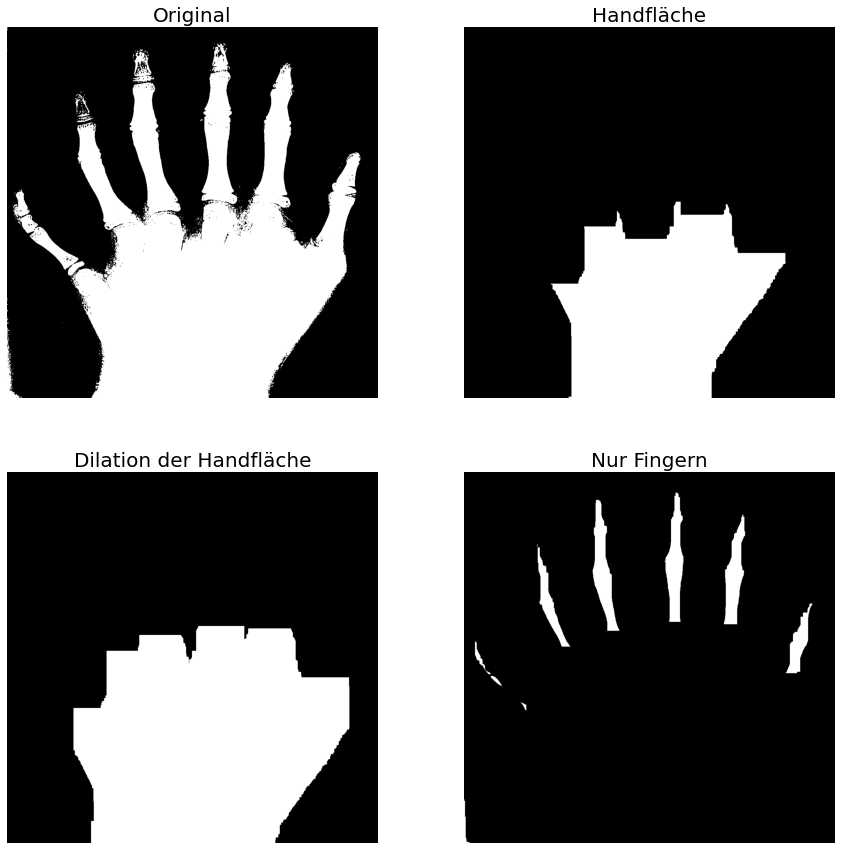

In [ ]:
# Bild 3
number3 = finger_count(path3)
print('Finger number is: ', number3)

### Aufgabe 2
Finden Sie die Knochen und die Hand. Berechnen Sie dazu den Anteil der Knochen an der Gesamtfläche der Hand.

#### nur Knochen

In [ ]:
def find_bones(path):

  #lesen
  gray = cv2.imread(path,0)

  #clache
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  cl_image = clahe.apply(gray)

  #mask
  mask_bone = cl_image>=155
  im_bone = np.where(mask_bone, cl_image, 0)


  #plot
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 20),
                         sharex=True, sharey=True)
  ax = axes.ravel()

  ax[0].imshow(gray, cmap=plt.cm.gray)
  ax[0].axis('off')
  ax[0].set_title('Original', fontsize=20)

  ax[1].imshow(cl_image, cmap=plt.cm.gray)
  ax[1].axis('off')
  ax[1].set_title('Clahe', fontsize=20)
  
  ax[2].imshow(im_bone, cmap=plt.cm.gray)
  ax[2].axis('off')
  ax[2].set_title('Mask', fontsize=20)
  
  return im_bone

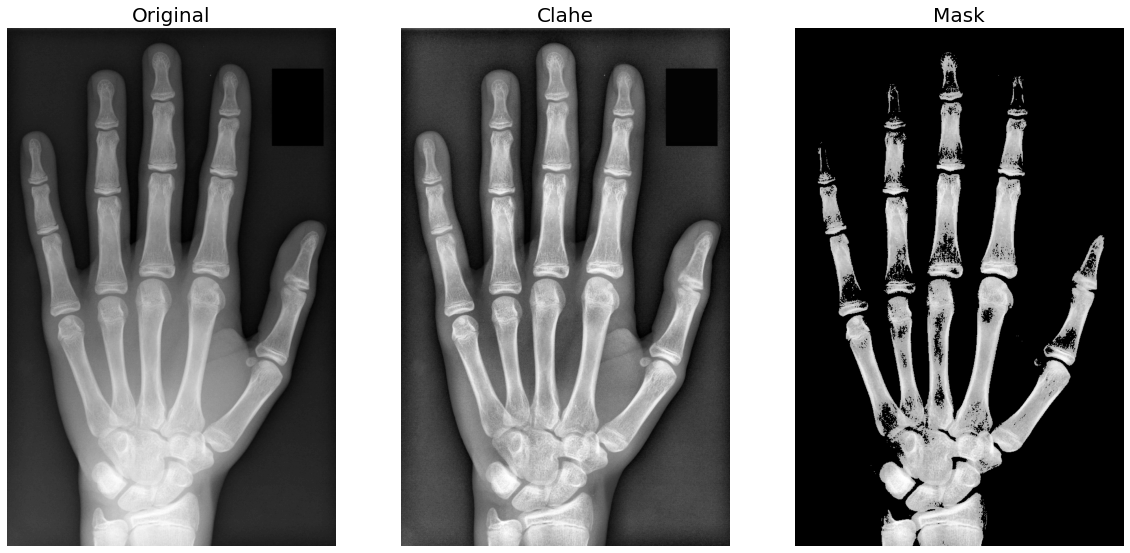

In [ ]:
bone = find_bones(path)

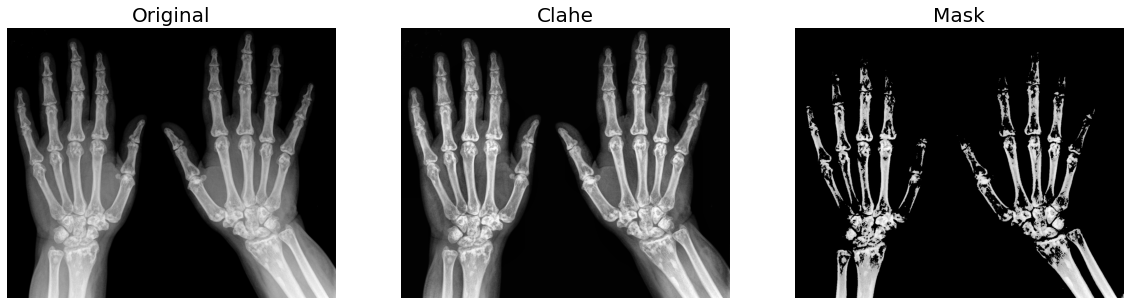

In [ ]:
bone2 = find_bones(path2)

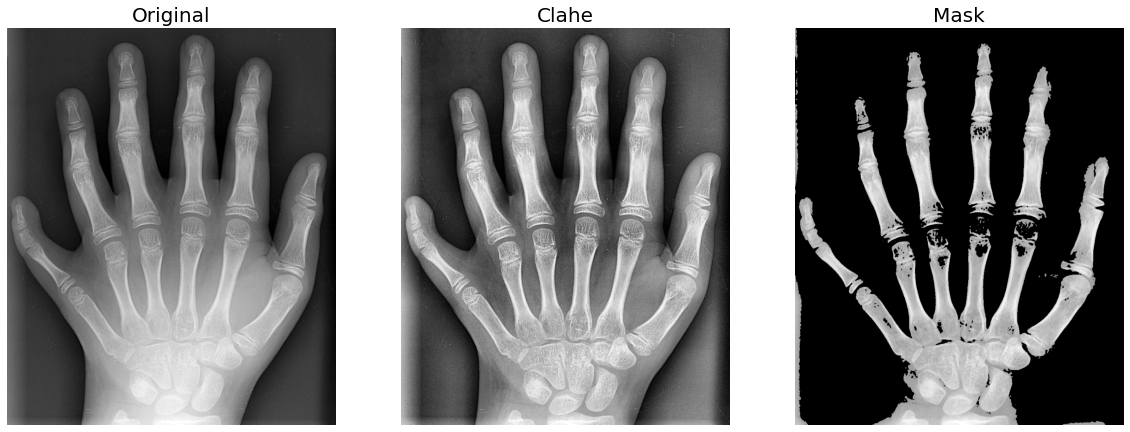

In [ ]:
bone3 = find_bones(path3)

#### nur Hand

In [ ]:
def threshold(path):
  gray = cv2.imread(path,0) 
  gray = cv2.GaussianBlur(gray, (7, 7), 0)
  image_res ,image_thresh = cv2.threshold(gray,60,255,cv2.THRESH_BINARY_INV)

  #plot
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 20),
                         sharex=True, sharey=True)
  ax = axes.ravel()

  ax[0].imshow(gray, cmap=plt.cm.gray)
  ax[0].axis('off')
  ax[0].set_title('Original', fontsize=20)
  
  ax[1].imshow(image_thresh, cmap=plt.cm.gray)
  ax[1].axis('off')
  ax[1].set_title('Hand', fontsize=20)

  return image_res ,image_thresh

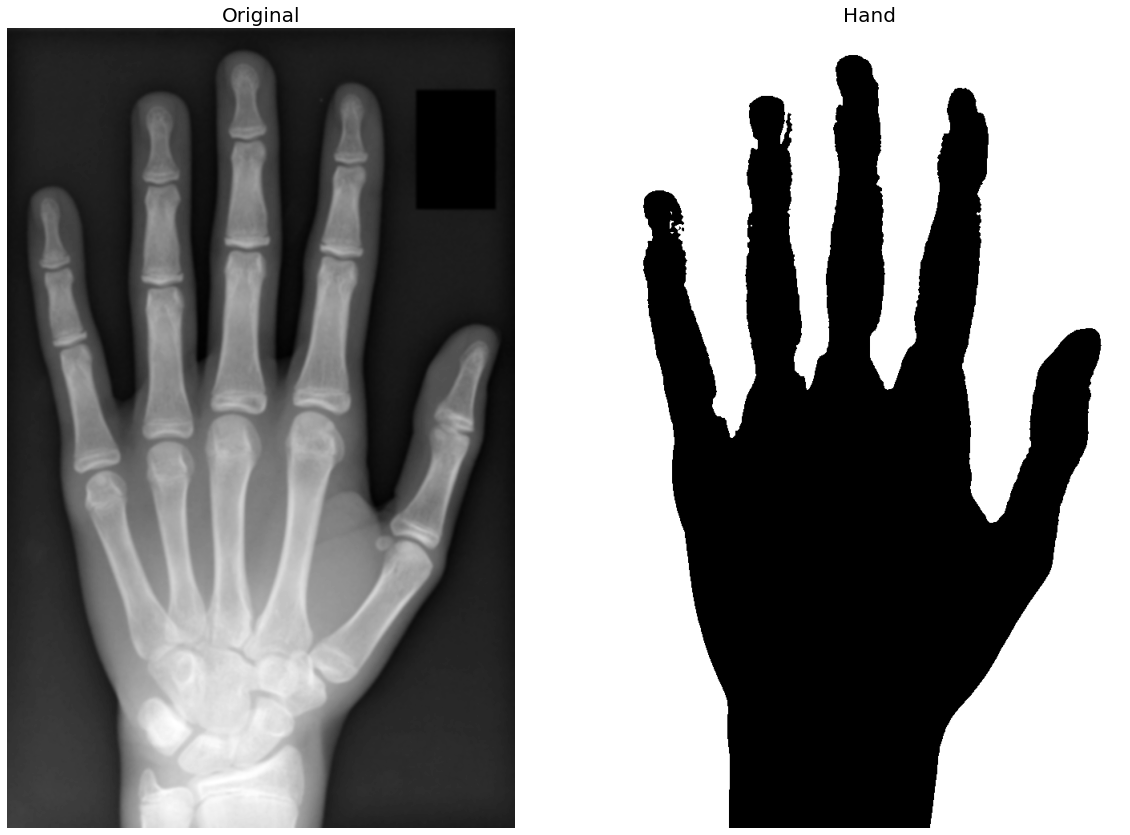

In [ ]:
# Bild 1
image_res ,image_thresh = threshold(path)

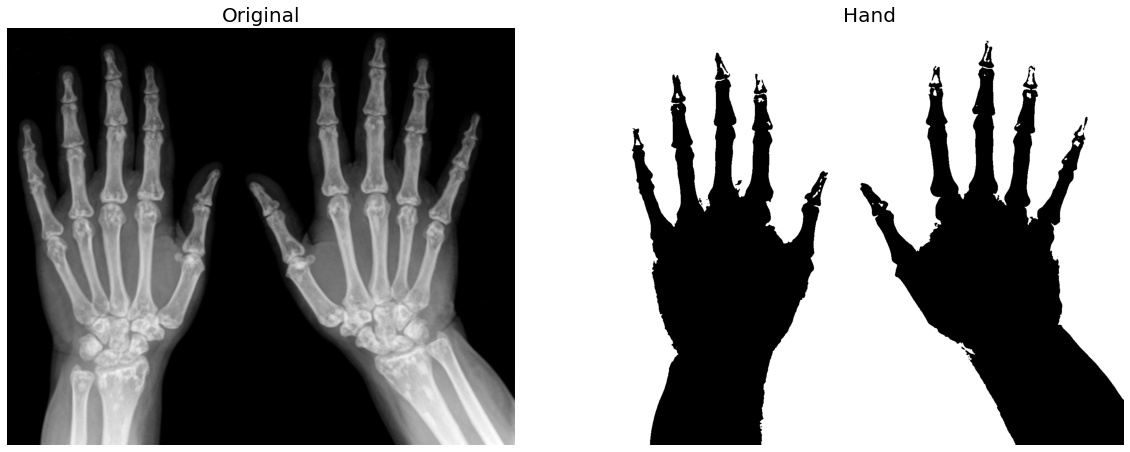

In [ ]:
# Bild 2
image_res2 ,image_thresh2 = threshold(path2)

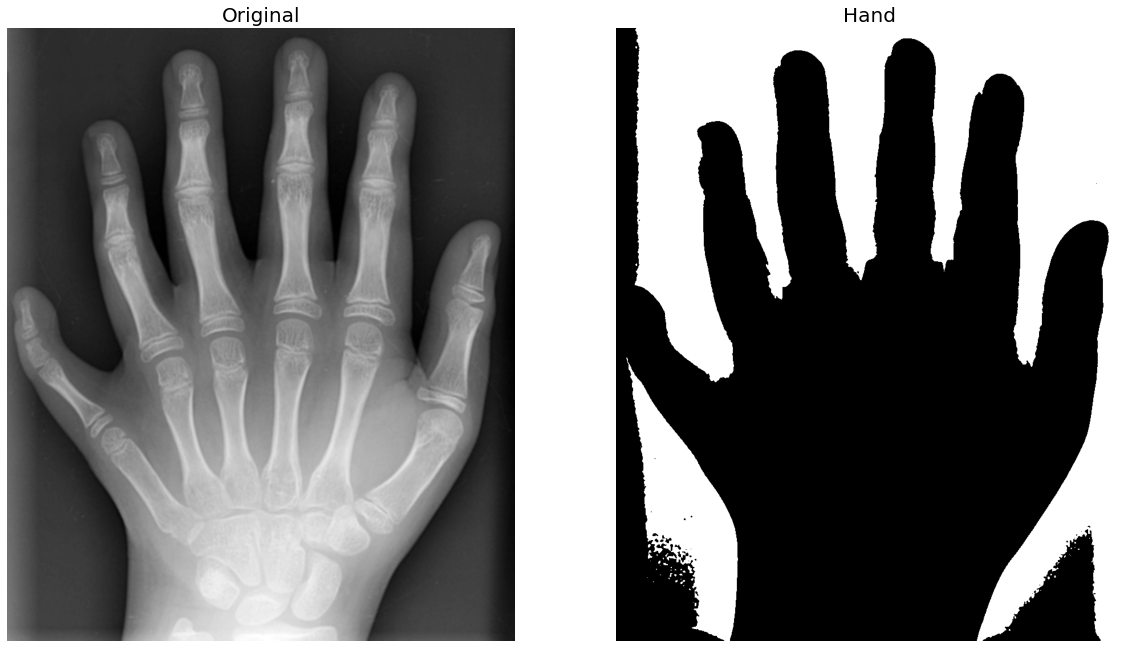

In [ ]:
# Bild 3
image_res3 ,image_thresh3 = threshold(path3)

#### Anteil

In [ ]:
# Bild 1
totalpixel = image_thresh.shape[0]*image_thresh.shape[1]
bone_pixel = np.count_nonzero(bone)
hand_pixel = totalpixel-np.count_nonzero(image_thresh)
anteil = bone_pixel / hand_pixel

print("Total Pixel",totalpixel)
print("Bone Pixel",bone_pixel)
print("Hand Pixel",hand_pixel)
print("Anteil der Knochen an der Gesamtfläche der Hand : ",anteil)

Total Pixel 634000
Bone Pixel 144571
Hand Pixel 288875
Anteil der Knochen an der Gesamtfläche der Hand :  0.5004621376027694


In [ ]:
# Bild 2
totalpixel2 = image_thresh2.shape[0]*image_thresh2.shape[1]
bone_pixel2 = np.count_nonzero(bone2)
hand_pixel2 = totalpixel2-np.count_nonzero(image_thresh2)
anteil2 = bone_pixel2 / hand_pixel2

print("Total Pixel",totalpixel2)
print("Bone Pixel",bone_pixel2)
print("Hand Pixel",hand_pixel2)
print("Anteil der Knochen an der Gesamtfläche der Hand : ",anteil2)


Total Pixel 1480226
Bone Pixel 211450
Hand Pixel 547998
Anteil der Knochen an der Gesamtfläche der Hand :  0.3858590724783667


In [ ]:
# Bild 3
totalpixel3 = image_thresh3.shape[0]*image_thresh3.shape[1]
bone_pixel3 = np.count_nonzero(bone3)
hand_pixel3 = totalpixel3-np.count_nonzero(image_thresh3)
anteil3 = bone_pixel3 / hand_pixel3

print("Total Pixel",totalpixel3)
print("Bone Pixel",bone_pixel3)
print("Hand Pixel",hand_pixel3)
print("Anteil der Knochen an der Gesamtfläche der Hand : ",anteil3)

Total Pixel 959607
Bone Pixel 267384
Hand Pixel 610282
Anteil der Knochen an der Gesamtfläche der Hand :  0.4381318800161237


### Aufgabe 3
Berechnen Sie die Anzahl gesamten (einzelnen) Knochen.


In [ ]:
def count_bones(path):

  #lesen
  gray = cv2.imread(path,0)

  #clache
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  cl_image = clahe.apply(gray)

  #mask
  mask_bone = cl_image>=155
  im_bone = np.where(mask_bone, cl_image, 0)

  #preprocess
  kernel = np.ones((5,5),np.uint8)
  finger = cv2.morphologyEx(im_bone, cv2.MORPH_CLOSE, kernel, iterations = 1)
  finger = cv2.erode(finger,kernel,iterations = 1)
  finger = cv2.dilate(finger, (1, 1), iterations=0)

  # find contours
  cnt, hierarchy = cv2.findContours(finger.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  # draw contours
  rgb = cv2.cvtColor(im_bone, cv2.COLOR_BGR2RGB)
  rgb2 = cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

  #plot
  fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 20),
                         sharex=True, sharey=True)
  ax = axes.ravel()

  ax[0].imshow(gray, cmap=plt.cm.gray)
  ax[0].axis('off')
  ax[0].set_title('Original', fontsize=20)

  ax[1].imshow(cl_image, cmap=plt.cm.gray)
  ax[1].axis('off')
  ax[1].set_title('Clahe', fontsize=20)

  ax[2].imshow(im_bone, cmap=plt.cm.gray)
  ax[2].axis('off')
  ax[2].set_title('Mask', fontsize=20)
  
  ax[3].imshow(finger, cmap=plt.cm.gray)
  ax[3].axis('off')
  ax[4].set_title('Preprocess', fontsize=20)
  
  ax[4].imshow(rgb2, cmap=plt.cm.gray)
  ax[4].axis('off')
  ax[4].set_title('Contours', fontsize=20)

  ax[5].set_visible(False)

  return cnt

Anzahl der Knochen 23


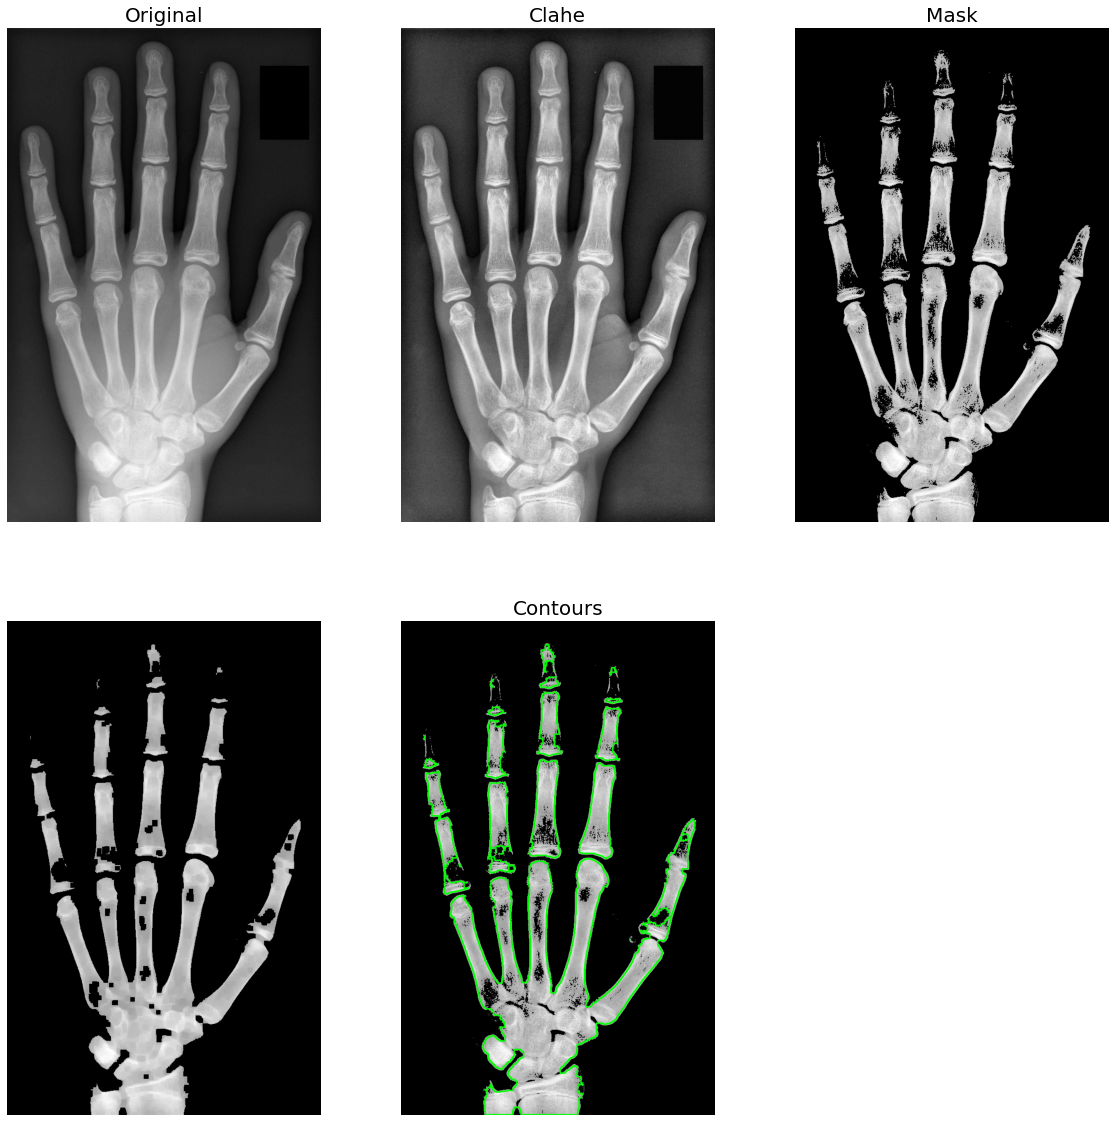

In [185]:
count1 = count_bones(path)
print("Anzahl der Knochen",len(count1))

Anzahl der Knochen 102


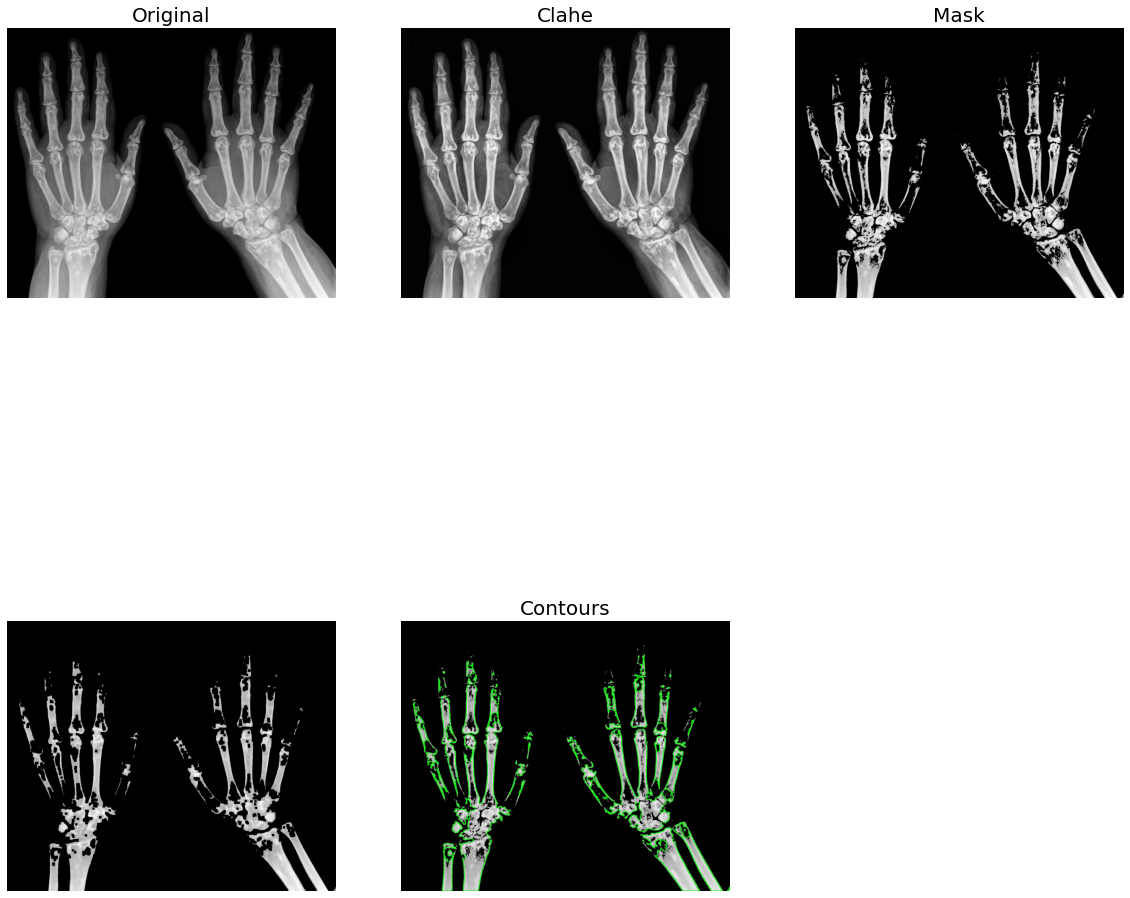

In [186]:
count2 = count_bones(path2)
print("Anzahl der Knochen",len(count2))

Anzahl der Knochen 29


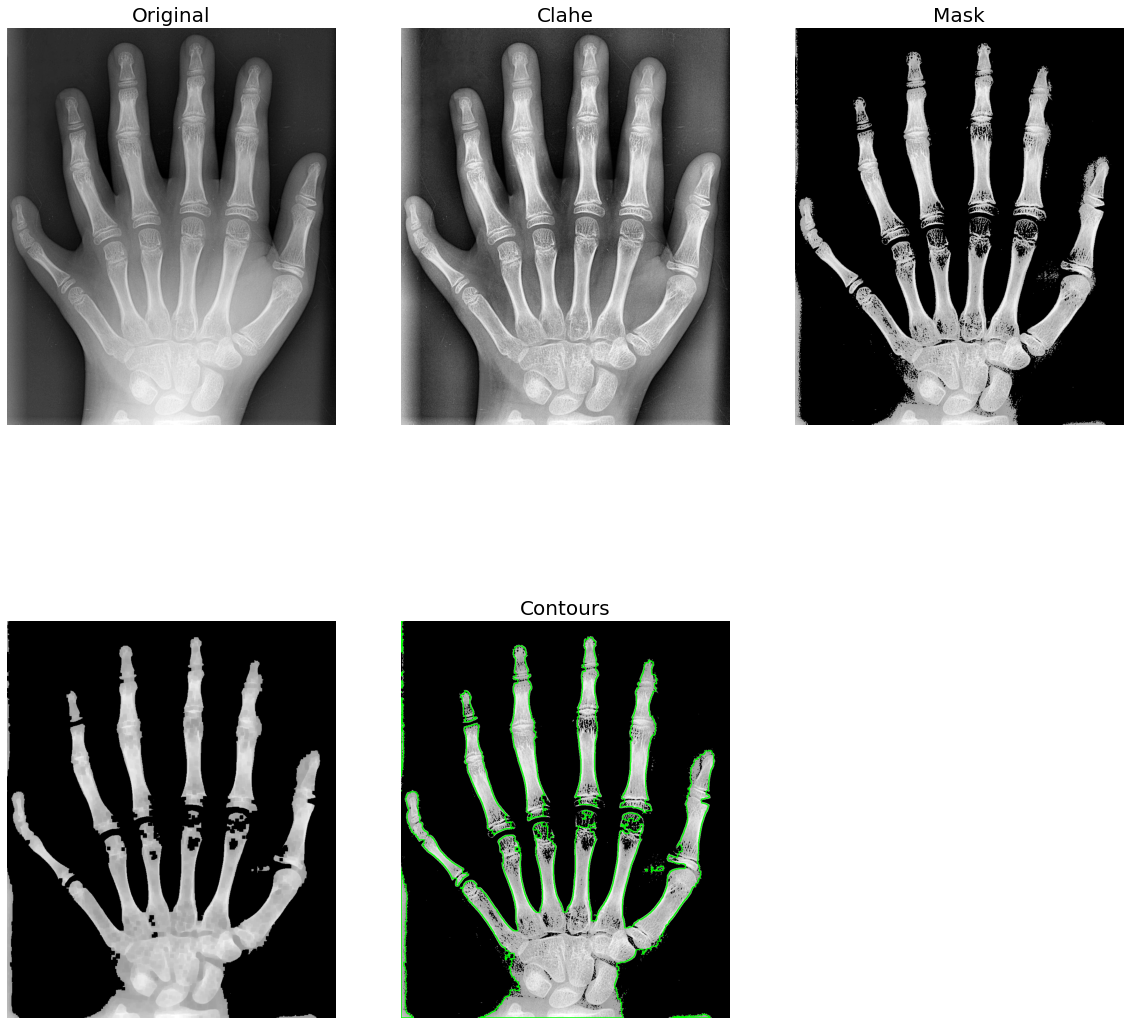

In [187]:
count3 = count_bones(path3)
print("Anzahl der Knochen",len(count3))

### Bonus - Aufgabe 4
Berechnen Sie die zusätzlich zur Anzahl auch die maximale Länge jedes Knochens.

In [190]:
# Bild 1
for c in count1:
  perimeter = cv2.arcLength(c,True)
  print("Length: ", perimeter)

Length:  0.0
Length:  0.0
Length:  10.242640614509583
Length:  4.0
Length:  20.82842707633972
Length:  4596.52219414711
Length:  642.4091612100601
Length:  724.0904005765915
Length:  494.20815074443817
Length:  507.23758828639984
Length:  78.62741661071777
Length:  12.0
Length:  359.0538227558136
Length:  311.78174459934235
Length:  87.69848430156708
Length:  77.79898953437805
Length:  371.2964633703232
Length:  33.071067690849304
Length:  10.828427076339722
Length:  109.94112491607666
Length:  6.0
Length:  48.485281229019165
Length:  171.35533845424652


In [191]:
# Bild 2
for c in count2:
  perimeter = cv2.arcLength(c,True)
  print("Length: ", perimeter)

Length:  45.65685415267944
Length:  13.899494767189026
Length:  2.0
Length:  0.0
Length:  707.722869515419
Length:  20.82842707633972
Length:  14.242640614509583
Length:  1148.991983294487
Length:  10.828427076339722
Length:  903.9625457525253
Length:  145.7401144504547
Length:  27.313708305358887
Length:  20.82842707633972
Length:  0.0
Length:  6.0
Length:  7.414213538169861
Length:  48.62741661071777
Length:  4.828427076339722
Length:  0.0
Length:  4.828427076339722
Length:  6.0
Length:  20.14213538169861
Length:  2.0
Length:  9.41421353816986
Length:  2.0
Length:  4.828427076339722
Length:  2.0
Length:  5.414213538169861
Length:  147.7401144504547
Length:  155.0538227558136
Length:  3.414213538169861
Length:  474.43354642391205
Length:  0.0
Length:  0.0
Length:  762.6416971683502
Length:  175.25483322143555
Length:  50.62741661071777
Length:  3.414213538169861
Length:  0.0
Length:  31.071067690849304
Length:  0.0
Length:  8.828427076339722
Length:  20.242640614509583
Length:  50.384

In [192]:
# Bild 3
for c in count3:
  perimeter = cv2.arcLength(c,True)
  print("Length: ", perimeter)

Length:  236.28427076339722
Length:  0.0
Length:  0.0
Length:  19.41421353816986
Length:  890.4680362939835
Length:  115.4558436870575
Length:  0.0
Length:  18.82842707633972
Length:  7.414213538169861
Length:  66.14213538169861
Length:  143.01219260692596
Length:  121.4558436870575
Length:  0.0
Length:  0.0
Length:  747.4528793096542
Length:  2.0
Length:  5663.860287666321
Length:  793.7716399431229
Length:  454.5269113779068
Length:  5.414213538169861
Length:  241.53910398483276
Length:  45.65685415267944
Length:  24.0
Length:  6.0
Length:  1059.9726504087448
Length:  4.0
Length:  1195.369619011879
Length:  1113.244728565216
Length:  192.62741661071777


### Achtung:

1. Die Lösung soll gelten für:
    - beliebig große Bilder (Zeilen- und Spaltenanzahl)
    - andere Bilder als das Testbild (z.B. `Testbild_Roentgen2.jpg`), jedoch in demselben Bildtyp (Grau- oder Farbbild) und mit derselben Art von Objekten
    - Objekte an beliebiger Stelle im Bild (auch Objekte an Rändern und Ecken können vorkommen!). „Unvollständige“ Objekte müssen allerdings nicht berücksichtigt werden. Also berücksichtigen Sie bitte, anders als in den bisherigen Übungen auch die Sonderfälle. 
    

2. Der Quellcode wird für die Benotung auch an anderen Bildern als diesen Testbildern getestet!


3. Bewertet werden:
    - Das Ergebnis (Anzahl gefundener Objekte, etc.)
    - Der Lösungsweg (Programmaufbau, Geschwindigkeit, benutzte Algorithmen)
    - Fehlerresistenz und Allgemeingültigkeit (Test mit anderen Bildern)
